<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/HandDigitRecognizationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape,y_train.shape #checking shape of trainning dataset

((60000, 28, 28), (60000,))

In [4]:
X_test.shape #checking shape of testing dataset

(10000, 28, 28)

In [5]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [6]:
def show_sample(X,y,index): 
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])

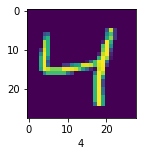

In [7]:
show_sample(X_train,y_train,2)

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
#Now normalizing data for X_train and X_test
X_train_norm=X_train/255
X_test_norm=X_test/255

In [11]:
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#Now data is normalize so we can train the model now using cnn
cnn=keras.models.Sequential(
    [
        #cnn layers
     keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
     keras.layers.MaxPooling2D((2,2)),
     keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
     keras.layers.MaxPooling2D((2,2)),
     #Dense Layers
     keras.layers.Flatten(),
     keras.layers.Dense(64,activation="relu"),
     keras.layers.Dense(10,activation="softmax")
    ]
)
cnn.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 3ms/step - loss: 0.3390 - accuracy: 0.9329
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0793 - accuracy: 0.9768
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9820
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9856
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [14]:
X_train[0].shape

(28, 28)

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9876


[0.06447812914848328, 0.9876000285148621]

In [21]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred[:5]

array([[2.2457986e-26, 2.4246157e-16, 5.7272817e-19, 1.8678663e-17,
        6.6148107e-18, 1.1657475e-22, 2.1871480e-34, 1.0000000e+00,
        4.5563633e-16, 1.5528591e-15],
       [4.4617416e-14, 1.6944862e-12, 1.0000000e+00, 6.6361612e-20,
        8.8774659e-25, 5.3675588e-32, 6.1591260e-17, 1.3709395e-19,
        2.1065933e-21, 4.9161303e-30],
       [1.0366541e-17, 1.0000000e+00, 5.2621343e-17, 3.7893873e-27,
        3.4798748e-18, 3.6148842e-17, 2.9016858e-16, 3.3824292e-14,
        2.9745554e-17, 5.8404799e-14],
       [1.0000000e+00, 3.3651456e-21, 3.1674640e-15, 9.0205713e-17,
        5.4152574e-15, 6.1884502e-16, 3.6307676e-11, 5.1025318e-17,
        1.5587442e-14, 3.2434738e-12],
       [5.4468759e-29, 5.0051637e-22, 1.7455746e-21, 1.2218516e-29,
        1.0000000e+00, 4.2961726e-17, 2.5911092e-14, 1.2112322e-24,
        5.5652537e-20, 5.9231943e-14]], dtype=float32)

In [23]:
y_pred_number=[np.argmax(element) for element in y_pred]

In [26]:
y_pred_number[:5] #these are predicted values

[7, 2, 1, 0, 4]

In [27]:
y_test[:5] #these are actual values

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
#checking classification report
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
print("This is classification report ",classification_report(y_test,y_pred_number))

This is classification report                precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

